# Задание 3. LeNet

Написать и обучить сеть LeNet/AlexNet для классификации цифр MNIST, не допустив переобучения. Соотношение обучающей и тестовой выборок 70 к 30. Отобразить график обучения, посчитать accuracy, precision, recall. 

## Установим окружение

In [9]:
! pip install -r requirements.txt

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
HIDDEN_LAYER_SIZE = 30
EPOCHS_NUM = 2500
RANDOM_SEED = 228

## Data
Скачаем датасет MNIST

In [12]:
! sh download_data.sh

In [13]:
from dataset import load_mnist, prepare_for_neural_network, random_split_train_val

x_train, y_train, x_test, y_test = load_mnist("data")
x_train, x_test = prepare_for_neural_network(x_train, x_test)
x_train, y_train, x_val, y_val = random_split_train_val(x_train, y_train, num_val=18000, random_seed=RANDOM_SEED)

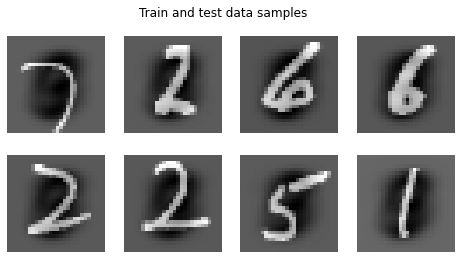

In [14]:
from visualization import data_visualization

data_visualization(x_train, x_train, RANDOM_SEED)

In [15]:
print('Train size:', x_train.shape[0])
print('Val size:', x_val.shape[0])
print('Test size:', x_test.shape[0])

Train size: 42000
Val size: 18000
Test size: 10000


## Modelling

In [16]:
from model import LeNet
from dataset import load_mnist, random_split_train_val
from trainer import Trainer, Dataset
from optimizers import Adam



model = LeNet(n_output_classes=10)
dataset = Dataset(x_train, y_train, x_val, y_val)
trainer = Trainer(model, dataset, Adam(), learning_rate=1e-3, num_epochs=6, batch_size=256)
loss_history, train_history, val_history = trainer.fit()

  0%|          | 0/165 [00:00<?, ?it/s]

Epoch 1  Train loss: 1.96784, Train accuracy: 0.17531, Val loss: -1.00000, val accuracy: 0.22939


  0%|          | 0/165 [00:00<?, ?it/s]

Epoch 2  Train loss: 1.64403, Train accuracy: 0.35043, Val loss: -1.00000, val accuracy: 0.47639


  0%|          | 0/165 [00:00<?, ?it/s]

Epoch 3  Train loss: 1.21856, Train accuracy: 0.50148, Val loss: -1.00000, val accuracy: 0.55228


  0%|          | 0/165 [00:00<?, ?it/s]

Epoch 4  Train loss: 0.51687, Train accuracy: 0.73424, Val loss: -1.00000, val accuracy: 0.79811


  0%|          | 0/165 [00:00<?, ?it/s]

Epoch 5  Train loss: 0.22312, Train accuracy: 0.88619, Val loss: -1.00000, val accuracy: 0.95283


  0%|          | 0/165 [00:00<?, ?it/s]

Epoch 6  Train loss: 0.05675, Train accuracy: 0.96798, Val loss: -1.00000, val accuracy: 0.96794


## Results

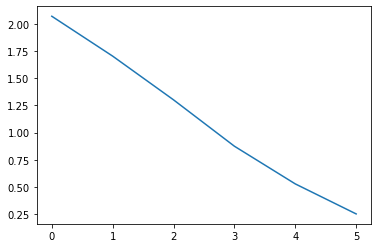

In [17]:
plt.plot(loss_history)

In [18]:
predict = model.predict(x_test)
predict

array([7, 2, 1, ..., 4, 5, 6])

In [20]:
from metrics import binary_classification_metrics
metrics = binary_classification_metrics(predict, y_test)
print('Precision:', metrics[0])
print('Recall:', metrics[1])
print('F1:', metrics[2])
print('Accuracy:', metrics[3])

Precision: 1.0
Recall: 1.0
F1: 1.0
Accuracy: 0.9725
